In [2]:
import numpy as np
import pandas as pd
import datetime
from scipy import stats
import math
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('joined_adj_close.csv')

In [29]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

,sh600000,sh600004,sh600006,sh600007,sh600008,sh600009,sh600010,sh600011,sh600012,sh600015,...,sz301236,sz301237,sz301248,sz301256,sz301258,sz301259,sz301263,sz301268,sz301279,sz301288
date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,0.76,3.30,1.82,3.12,1.08,10.28,0.55,2.99,2.57,1.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05,0.75,3.36,1.84,3.18,1.09,10.38,0.55,2.95,2.59,1.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-06,0.74,3.36,1.82,3.15,1.08,10.43,0.55,2.91,2.64,1.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-07,0.74,3.43,1.82,3.21,1.09,10.55,0.55,2.92,2.64,1.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-10,0.77,3.44,1.84,3.27,1.10,10.56,0.56,2.89,2.68,1.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-05,7.99,12.16,4.76,14.13,2.92,51.30,1.86,7.12,7.22,5.38,...,42.46,34.01,29.95,9.52,43.00,34.30,23.72,20.83,25.88,28.50
2022-05-06,7.85,11.40,4.64,13.75,2.84,48.21,1.80,6.80,7.15,5.26,...,44.93,34.30,32.30,9.46,43.59,29.28,24.21,20.48,26.42,29.19
2022-05-09,7.82,11.25,4.64,15.13,2.93,47.25,1.84,6.99,7.19,5.27,...,45.31,34.65,32.51,9.85,46.20,35.14,24.58,20.61,26.65,32.74


In [30]:
# Resample `aapl` to business months, take last observation as value 
monthly = df.resample('M').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = df.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,sh600000,sh600004,sh600006,sh600007,sh600008,sh600009,sh600010,sh600011,sh600012,sh600015,...,sz301236,sz301237,sz301248,sz301256,sz301258,sz301259,sz301263,sz301268,sz301279,sz301288
date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-31,0.031395,-0.091690,-0.086021,-0.080198,0.028030,0.046029,0.008762,0.035661,0.135567,-0.015733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-30,0.118139,0.045092,-0.016040,-0.037630,0.100311,0.008670,0.018722,-0.083933,-0.053131,0.008591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-31,0.146655,-0.003779,-0.040279,-0.007277,0.129932,-0.123615,0.038785,-0.069012,-0.154458,0.143791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-31,0.301360,-0.045160,0.163206,0.363303,0.200519,0.018155,0.233264,0.079981,0.155743,0.235975,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-09-30,0.065161,0.057837,0.171647,0.364636,-0.013451,0.128376,0.045967,0.023132,0.061550,-0.014903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-31,0.816715,0.154084,0.223863,0.351135,0.154994,0.342476,0.253030,0.320138,0.137015,0.529196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-31,0.513425,0.697625,1.056121,0.748374,0.803247,0.561673,1.171190,0.665341,0.462273,0.779496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-30,0.613005,0.469073,0.206876,0.412611,0.502015,0.385893,0.220039,0.330187,0.058153,0.378813,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
train = df.loc[pd.Timestamp('2011-01-01'):pd.Timestamp('2020-12-31')]
val = df.loc[pd.Timestamp('2021-01-01'):pd.Timestamp('2021-12-31')]
test = df.loc[pd.Timestamp('2022-01-01'):pd.Timestamp('2022-05-11')]

In [133]:
tickers = train.columns
hqm_columns = [
                'Ticker', 
                'Price', 
                'Number of Shares to Buy', 
                'One-Year Price Return', 
                'One-Year Return Percentile',
                'Six-Month Price Return',
                'Six-Month Return Percentile',
                'Three-Month Price Return',
                'Three-Month Return Percentile',
                'One-Month Price Return',
                'One-Month Return Percentile',
                'HQM Score'
                ]

hqm_dataframe = pd.DataFrame(columns = hqm_columns)
hqm_dataframe['Ticker'] = tickers
hqm_dataframe.set_index('Ticker', inplace=True)
for row in hqm_dataframe.index:
    hqm_dataframe.loc[row, 'Price'] = train[row][-1]

In [134]:
hqm_dataframe

,Price,Number of Shares to Buy,One-Year Price Return,One-Year Return Percentile,Six-Month Price Return,Six-Month Return Percentile,Three-Month Price Return,Three-Month Return Percentile,One-Month Price Return,One-Month Return Percentile,HQM Score
Ticker,,,,,,,,,,,
sh600000,9.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sh600004,14.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sh600006,9.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sh600007,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sh600008,2.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
sz301259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sz301263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sz301268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
time_periods = [
                'One-Year',
                'Six-Month',
                'Three-Month',
                'One-Month'
                ]
freq = ''

for row in hqm_dataframe.index:
    for time_period in time_periods:
        if time_period == 'One-Year': freq='Y'
        if time_period == 'Six-Month': freq='6M'
        if time_period == 'Three-Month': freq='3M'
        if time_period == 'One-Month': freq='M'
        hqm_dataframe.loc[row, f'{time_period} Price Return'] = train[row].resample(freq).apply(lambda x: x[-1]).pct_change()[-1]

In [136]:
time_periods = [
                'One-Year',
                'Six-Month',
                'Three-Month',
                'One-Month'
                ]
for row in hqm_dataframe.index:
    for time_period in time_periods:
        hqm_dataframe.loc[row, f'{time_period} Return Percentile'] = stats.percentileofscore(hqm_dataframe[f'{time_period} Price Return'], hqm_dataframe.loc[row, f'{time_period} Price Return'])/100

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1950: RuntimeWarning: invalid value encountered in less
  left = np.count_nonzero(a < score)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1951: RuntimeWarning: invalid value encountered in less_equal
  right = np.count_nonzero(a <= score)


In [137]:
from statistics import mean

for row in hqm_dataframe.index:
    momentum_percentiles = []
    for time_period in time_periods:
        momentum_percentiles.append(hqm_dataframe.loc[row, f'{time_period} Return Percentile'])
    hqm_dataframe.loc[row, 'HQM Score'] = mean(momentum_percentiles)

In [139]:
selected = hqm_dataframe.sort_values(by = 'HQM Score', ascending = False)[:101]
selected

,Price,Number of Shares to Buy,One-Year Price Return,One-Year Return Percentile,Six-Month Price Return,Six-Month Return Percentile,Three-Month Price Return,Three-Month Return Percentile,One-Month Price Return,One-Month Return Percentile,HQM Score
Ticker,,,,,,,,,,,
sh600121,9.32,NaN,2.932489,0.742681,3.707071,0.78235,3.636816,0.814171,1.49866,0.818413,0.789404
sh600189,14.69,NaN,2.865789,0.742257,2.489311,0.782138,1.182764,0.812049,0.802454,0.816928,0.788343
sz002756,53.95,NaN,2.10593,0.735469,1.878869,0.781078,1.959408,0.813746,0.866782,0.817353,0.786911
sh600199,19.41,NaN,2.11557,0.735681,1.741525,0.780017,1.837719,0.813534,0.962588,0.817989,0.786805
sz300274,72.17,NaN,5.893028,0.7465,2.441583,0.781714,0.861491,0.807594,0.504168,0.811201,0.786752
...,...,...,...,...,...,...,...,...,...,...,...
sh600418,12.2,NaN,1.44,0.715952,0.318919,0.713407,0.438679,0.787017,0.260331,0.782987,0.749841
sz002041,22.27,NaN,1.329498,0.710649,0.440492,0.735469,0.305393,0.762198,0.306925,0.790836,0.749788
sz300083,11.78,NaN,1.952381,0.732287,0.176823,0.667374,0.470662,0.791472,0.42615,0.805685,0.749204


In [142]:
portfolio_size = 100000
position_size = float(portfolio_size) / len(selected.index)
for row in selected.index:
    selected.loc[row, 'Number of Shares to Buy'] = math.floor(position_size / selected['Price'][row])
selected

,Price,Number of Shares to Buy,One-Year Price Return,One-Year Return Percentile,Six-Month Price Return,Six-Month Return Percentile,Three-Month Price Return,Three-Month Return Percentile,One-Month Price Return,One-Month Return Percentile,HQM Score
Ticker,,,,,,,,,,,
sh600121,9.32,106,2.932489,0.742681,3.707071,0.78235,3.636816,0.814171,1.49866,0.818413,0.789404
sh600189,14.69,67,2.865789,0.742257,2.489311,0.782138,1.182764,0.812049,0.802454,0.816928,0.788343
sz002756,53.95,18,2.10593,0.735469,1.878869,0.781078,1.959408,0.813746,0.866782,0.817353,0.786911
sh600199,19.41,51,2.11557,0.735681,1.741525,0.780017,1.837719,0.813534,0.962588,0.817989,0.786805
sz300274,72.17,13,5.893028,0.7465,2.441583,0.781714,0.861491,0.807594,0.504168,0.811201,0.786752
...,...,...,...,...,...,...,...,...,...,...,...
sh600418,12.2,81,1.44,0.715952,0.318919,0.713407,0.438679,0.787017,0.260331,0.782987,0.749841
sz002041,22.27,44,1.329498,0.710649,0.440492,0.735469,0.305393,0.762198,0.306925,0.790836,0.749788
sz300083,11.78,84,1.952381,0.732287,0.176823,0.667374,0.470662,0.791472,0.42615,0.805685,0.749204


In [194]:
selected

,Price,Number of Shares to Buy,One-Year Price Return,One-Year Return Percentile,Six-Month Price Return,Six-Month Return Percentile,Three-Month Price Return,Three-Month Return Percentile,One-Month Price Return,One-Month Return Percentile,HQM Score
Ticker,,,,,,,,,,,
sh600121,9.32,106,2.932489,0.742681,3.707071,0.78235,3.636816,0.814171,1.49866,0.818413,0.789404
sh600189,14.69,67,2.865789,0.742257,2.489311,0.782138,1.182764,0.812049,0.802454,0.816928,0.788343
sz002756,53.95,18,2.10593,0.735469,1.878869,0.781078,1.959408,0.813746,0.866782,0.817353,0.786911
sh600199,19.41,51,2.11557,0.735681,1.741525,0.780017,1.837719,0.813534,0.962588,0.817989,0.786805
sz300274,72.17,13,5.893028,0.7465,2.441583,0.781714,0.861491,0.807594,0.504168,0.811201,0.786752
...,...,...,...,...,...,...,...,...,...,...,...
sh600418,12.2,81,1.44,0.715952,0.318919,0.713407,0.438679,0.787017,0.260331,0.782987,0.749841
sz002041,22.27,44,1.329498,0.710649,0.440492,0.735469,0.305393,0.762198,0.306925,0.790836,0.749788
sz300083,11.78,84,1.952381,0.732287,0.176823,0.667374,0.470662,0.791472,0.42615,0.805685,0.749204


In [198]:
val_selected = val[selected.index]
val_selected

,sh600121,sh600189,sz002756,sh600199,sz300274,sh603025,sh601908,sh603185,sh600316,sh600559,...,sh603317,sh603110,sh600711,sh600763,sh688002,sh600418,sz002041,sz300083,sz000923,sh601579
date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,9.14,16.16,57.71,20.21,78.07,29.83,10.82,137.54,59.56,34.44,...,63.38,21.39,9.87,268.00,120.30,12.12,23.20,11.70,24.82,14.68
2021-01-05,8.44,14.62,63.48,20.61,76.70,29.86,11.58,138.54,59.11,35.11,...,61.61,22.15,9.28,283.69,122.11,11.77,22.59,11.79,24.57,14.19
2021-01-06,8.72,14.21,62.09,19.24,80.03,28.31,12.74,146.08,61.11,34.69,...,64.91,22.75,8.99,296.50,119.49,11.23,23.89,11.41,23.63,13.24
2021-01-07,8.28,14.51,63.03,18.22,88.86,26.35,13.19,153.06,61.21,33.22,...,62.13,22.94,9.66,303.44,120.20,11.47,24.75,11.15,24.70,12.37
2021-01-08,8.34,15.96,58.57,18.76,85.10,26.85,14.51,149.50,56.17,34.97,...,62.05,22.07,9.45,304.84,110.65,11.41,23.86,11.66,27.17,13.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,4.88,7.87,122.00,17.27,135.70,27.04,9.00,159.88,38.09,29.71,...,27.49,40.54,10.54,200.36,73.31,17.47,26.55,13.91,14.03,11.44
2021-12-28,4.81,7.88,134.20,17.32,138.85,27.53,9.06,164.60,37.88,29.76,...,28.26,41.55,10.82,199.21,77.29,18.50,26.98,13.91,14.31,11.64
2021-12-29,4.81,7.81,143.11,16.84,138.49,27.02,9.03,164.99,38.60,28.20,...,26.92,41.65,10.78,203.02,76.57,17.83,25.49,13.74,14.21,11.29


In [211]:
# Initialize the short and long windows
short_window = 7
long_window = 30

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=val.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = val['sh600189'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = val['sh600189'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
signals

,signal,short_mavg,long_mavg,positions
date,,,,
2021-01-04,0.0,16.160000,16.160000,NaN
2021-01-05,0.0,15.390000,15.390000,0.0
2021-01-06,0.0,14.996667,14.996667,0.0
2021-01-07,0.0,14.875000,14.875000,0.0
2021-01-08,0.0,15.092000,15.092000,0.0
...,...,...,...,...
2021-12-27,0.0,8.157143,8.167333,-1.0
2021-12-28,0.0,8.085714,8.166000,0.0
2021-12-29,0.0,8.015714,8.164333,0.0


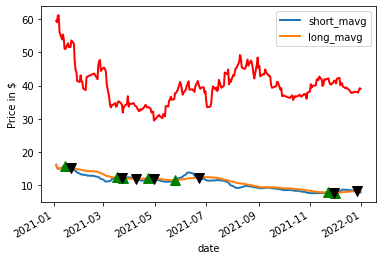

In [222]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
val['sh600189'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='g')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [213]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['sh600189'] = 100*signals['signal']

# Initialize the portfolio with value owned   
portfolio = positions.multiply(val['sh600189'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(val['sh600189'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(val['sh600189'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.head())

            sh600189  holdings      cash     total  returns
date                                                       
2021-01-04       0.0       0.0  100000.0  100000.0      NaN
2021-01-05       0.0       0.0  100000.0  100000.0      0.0
2021-01-06       0.0       0.0  100000.0  100000.0      0.0
2021-01-07       0.0       0.0  100000.0  100000.0      0.0
2021-01-08       0.0       0.0  100000.0  100000.0      0.0


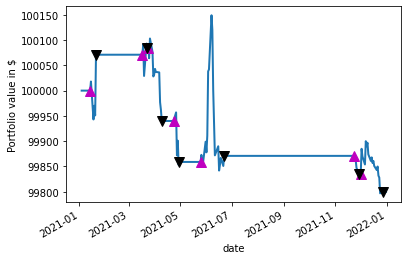

In [214]:
# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [215]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

-0.5960741375228945


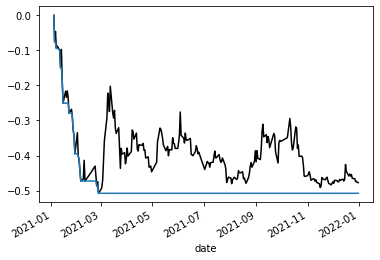

In [216]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = val['sh600121'].rolling(window, min_periods=1).max()
daily_drawdown = val['sh600121']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot(color='k')
max_daily_drawdown.plot()

# Show the plot
plt.show()

In [217]:
max_drawdown = max_daily_drawdown.min()
max_drawdown

-0.5076586433260395

In [218]:
# skip first row with NA 
df_daily_returns = returns[1:]
# Calculate the cumulative daily returns
df_cum_daily_returns = (1 + df_daily_returns).cumprod() - 1
df_cum_daily_returns = df_cum_daily_returns.reset_index()
cum_return_entire_period = df_cum_daily_returns.iloc[-1, 1] 
cum_return_entire_period 

-0.002000000000000779

In [219]:
romad = cum_return_entire_period / abs(max_drawdown)
romad

-0.003939655172415327

In [210]:
portfolio

,sh600121,holdings,cash,total,returns
date,,,,,
2021-01-04,0.0,0.0,100000.0,100000.0,NaN
2021-01-05,0.0,0.0,100000.0,100000.0,0.00000
2021-01-06,0.0,0.0,100000.0,100000.0,0.00000
2021-01-07,0.0,0.0,100000.0,100000.0,0.00000
2021-01-08,0.0,0.0,100000.0,100000.0,0.00000
...,...,...,...,...,...
2021-12-27,488.0,339.0,99661.0,100000.0,0.00001
2021-12-28,481.0,336.0,99661.0,99997.0,-0.00003
2021-12-29,481.0,337.0,99661.0,99998.0,0.00001
